# $\textit{Imported Libraries}$ 

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# $\textit{Deep Learning Model for handwritten numbers}$

#### $\textit{Data downloaded from keras}$

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

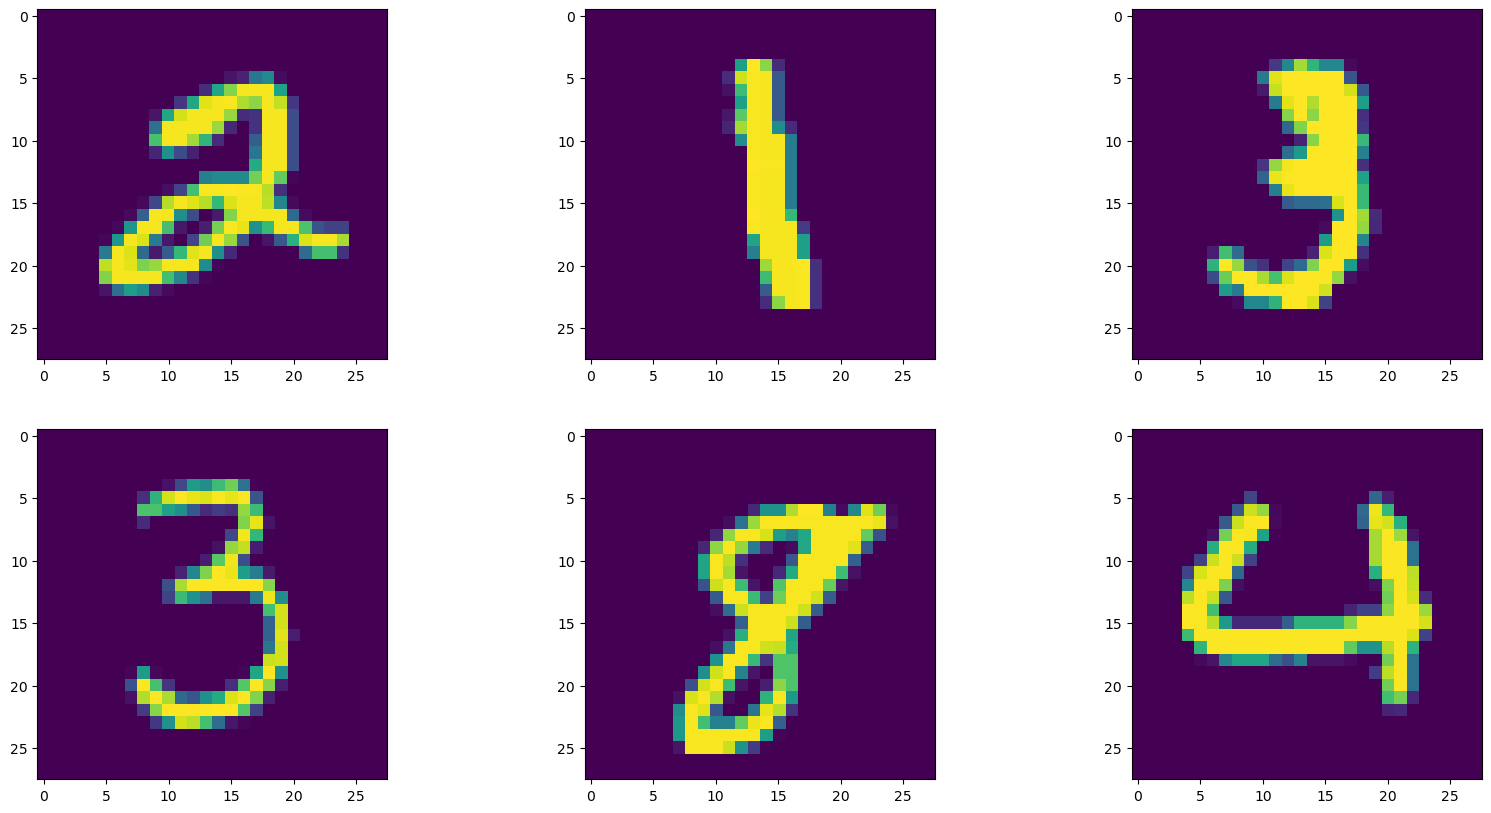

In [4]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(20,10))
ax1.imshow(X_train[5])
ax2.imshow(X_train[6])
ax3.imshow(X_train[10])
ax4.imshow(X_train[50])
ax5.imshow(X_train[55])
ax6.imshow(X_train[60])

In [5]:
print("length of training data is ",len(X_train), "and",len(y_train))
print("length of testing data is ",len(X_test), "and",len(y_test))
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

length of training data is  60000 and 60000
length of testing data is  10000 and 10000
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### $\textit{Generally we use scaled data so that our model achieves faster convergence}$

In [6]:
X_train = X_train/255
X_test = X_test/255

### $\textit{Feed Forward Neural Network}$

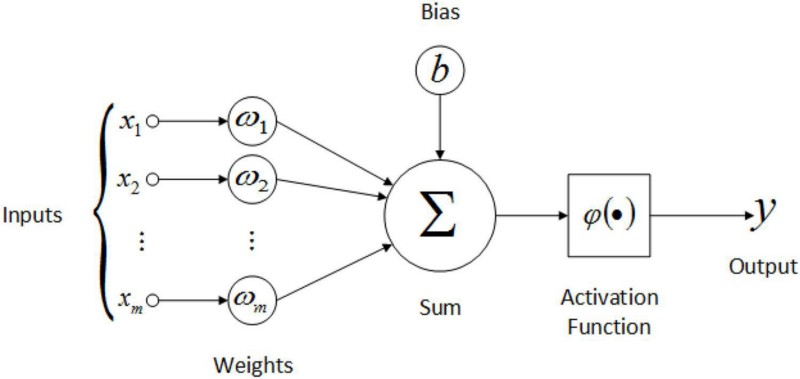

In [7]:
model_NN = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # keras.layers.Dense(500, activation='relu'),
    # keras.layers.Dense(280, activation='sigmoid'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_NN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_NN = model_NN.fit(X_train, y_train, epochs=10,validation_split = 0.1)

2023-12-09 22:42:40.471661: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3164 - accuracy: 0.9096 - val_loss: 0.1610 - val_accuracy: 0.9542
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1526 - accuracy: 0.9546 - val_loss: 0.1136 - val_accuracy: 0.9688
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9671 - val_loss: 0.0976 - val_accuracy: 0.9722
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.0980 - val_accuracy: 0.9685
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0695 - accuracy: 0.9789 - val_loss: 0.0992 - val_accuracy: 0.9712
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0794 - val_accuracy: 0.9765
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0857 - val_accuracy:

In [8]:
y_predicted = model_NN.predict(X_test)

y_predicted = [np.argmax(i) for i in y_predicted]

print(len(y_test),len(y_predicted))

313/313 [==============================] - 0s 1ms/step
10000 10000


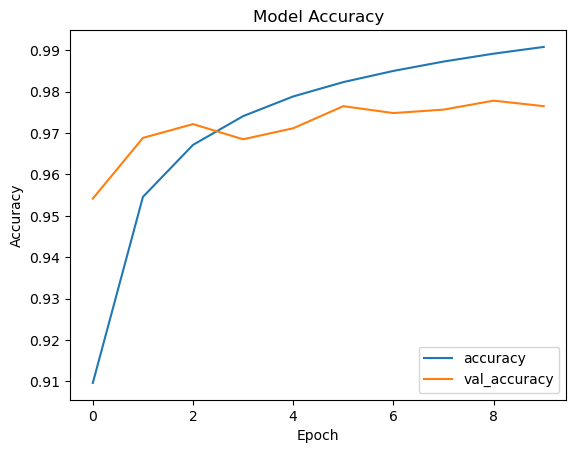

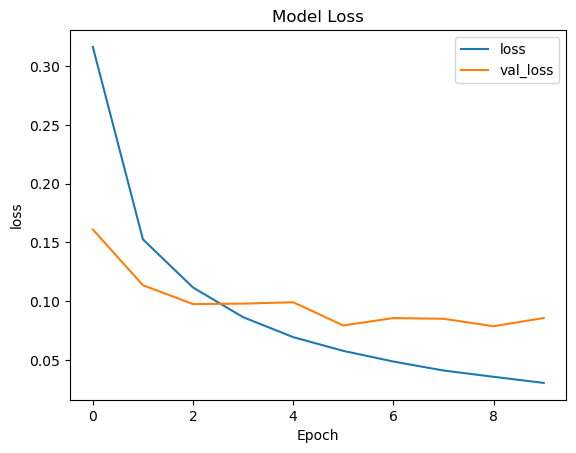

In [9]:
plt.plot(history_NN.history['accuracy'], label='accuracy')
plt.plot(history_NN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()
plt.plot(history_NN.history['loss'], label='loss')
plt.plot(history_NN.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.show()


In [10]:
test_loss, test_acc = model_NN.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0928 - accuracy: 0.9752 - 613ms/epoch - 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

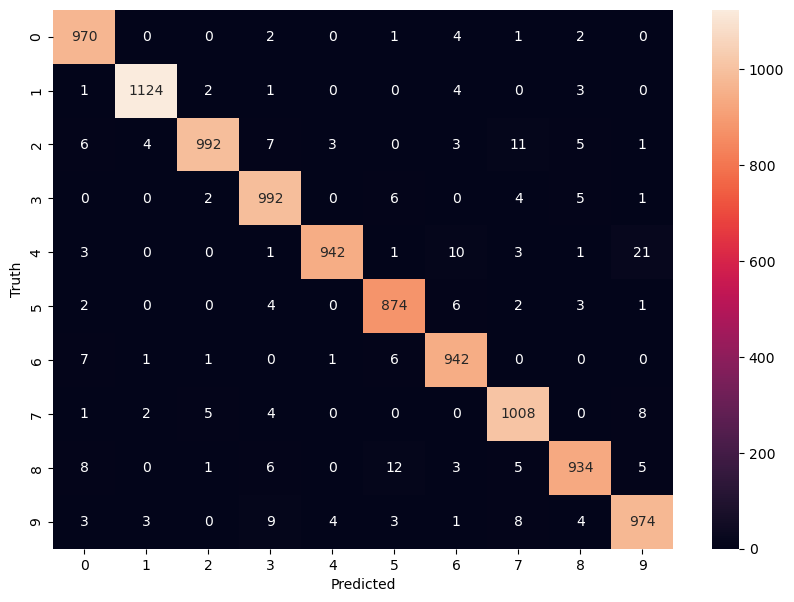

In [11]:
c_metx = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(c_metx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### $\textit{Testing on random hand written digit}$

In [12]:
def shape(a):
    a = a.reshape(1,28,28)
    return a
def predict_out(y):
    a = np.argmax(y)
    return a

In [13]:
import cv2

def import_img(hand_digit3):
    im = cv2.imread('/home/sanjay/Msc_Project/sanjay_123/{}.png'.format(hand_digit3),cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(im, (28,28))
    a = image.reshape(1,28,28)
    return image,a/255
    
    
img7 = import_img('hand_digit7')

img3 = import_img('hand_digit3')


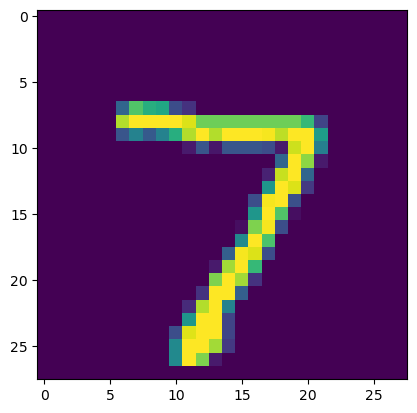

In [14]:
plt.imshow(img7[0])

In [15]:
predict_out(model_NN.predict(shape(img7[1])))

1/1 [==============================] - 0s 19ms/step


7

1/1 [==============================] - 0s 18ms/step


3

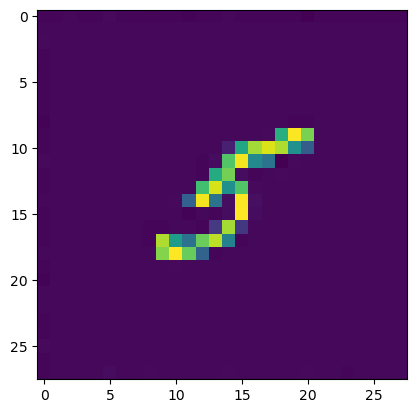

In [16]:
img5 = import_img('hand_digit5')
plt.imshow(img5[0])
predict_out(model_NN.predict((img5[1])))

1/1 [==============================] - 0s 18ms/step


2

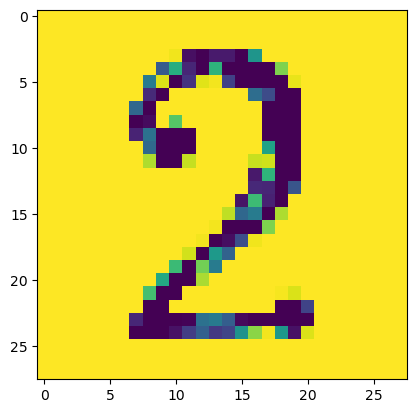

In [17]:
img9 = import_img('hand_digit2')
plt.imshow(((img9[0])))
predict_out(model_NN.predict((img9[1])))

## $\textit{Convolutional Neural Network}$

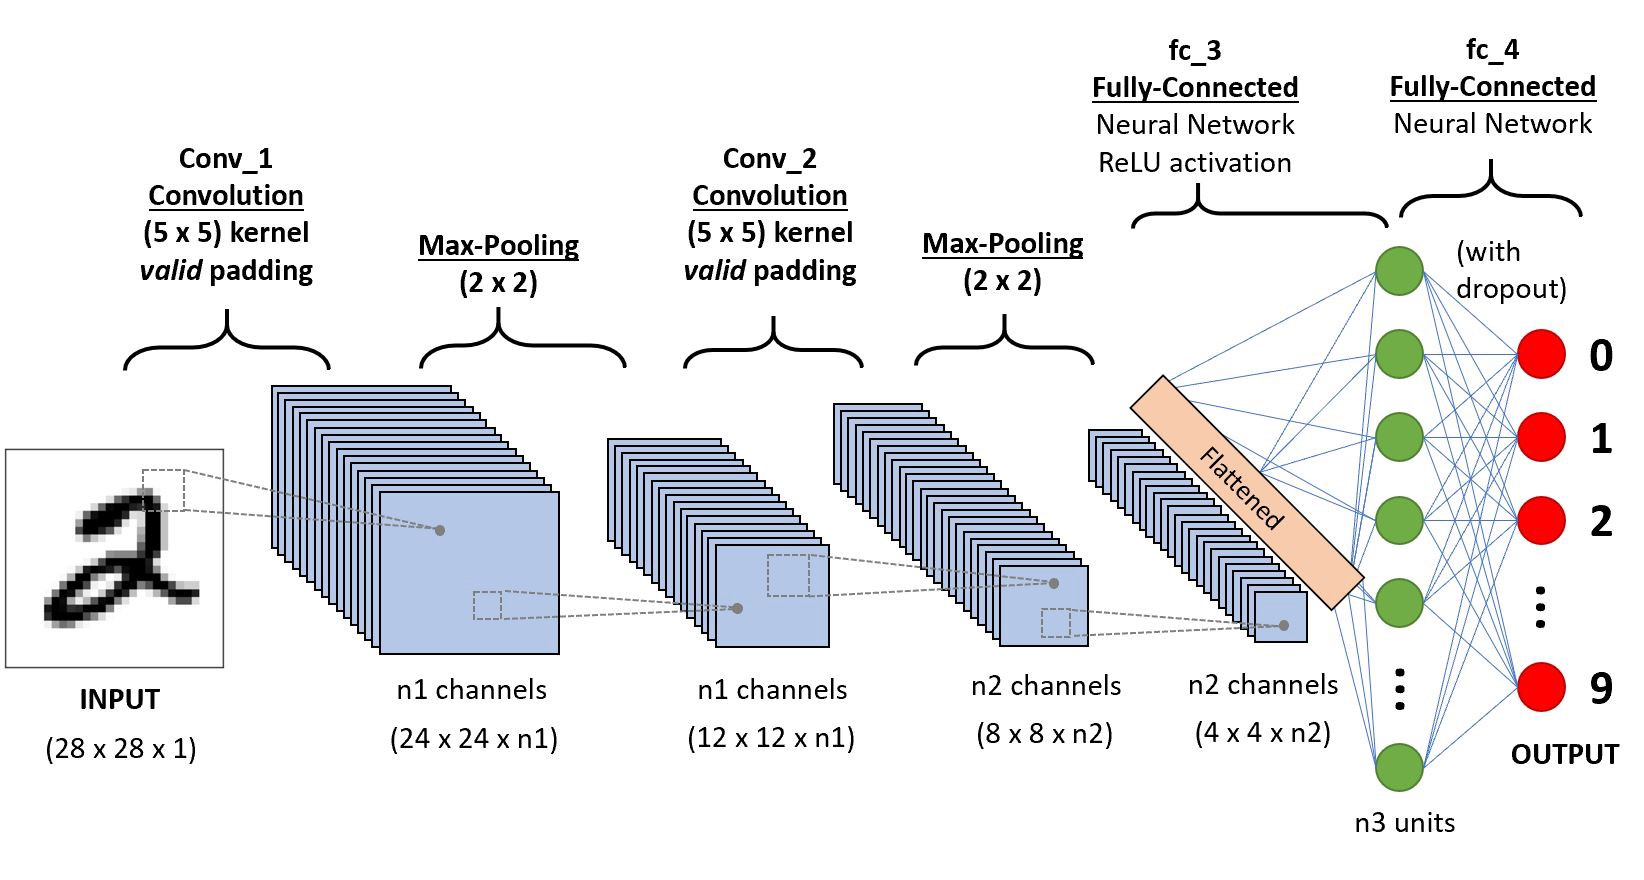

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models


model_cnn = models.Sequential()


model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model_cnn.add(layers.MaxPooling2D((2, 2)))


model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_cnn.add(layers.MaxPooling2D((2, 2)))


model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_cnn.add(layers.Flatten())


model_cnn.add(layers.Dense(64, activation='relu'))

model_cnn.add(layers.Dense(10, activation='softmax'))


model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_cnn.summary()


# Assuming you have X_train (images) and y_train (labels) as your training data
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [29]:
y_predicted_cnn = model_cnn.predict(X_test)

y_predicted_cnn = [np.argmax(i) for i in y_predicted]

print(len(y_test),len(y_predicted_cnn))

313/313 [==============================] - 1s 4ms/step
10000 10000


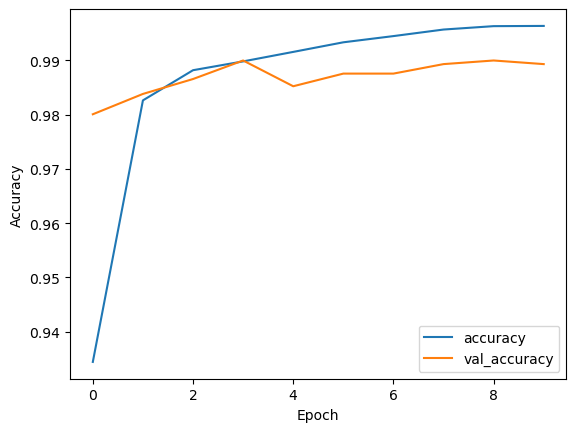

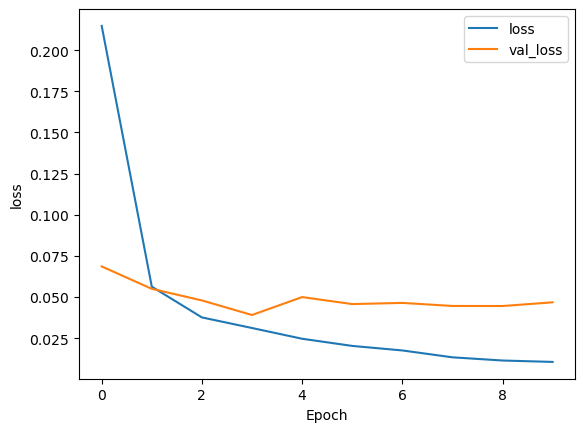

In [30]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.show()

In [31]:
test_loss, test_acc = model_cnn.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0356 - accuracy: 0.9905 - 1s/epoch - 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

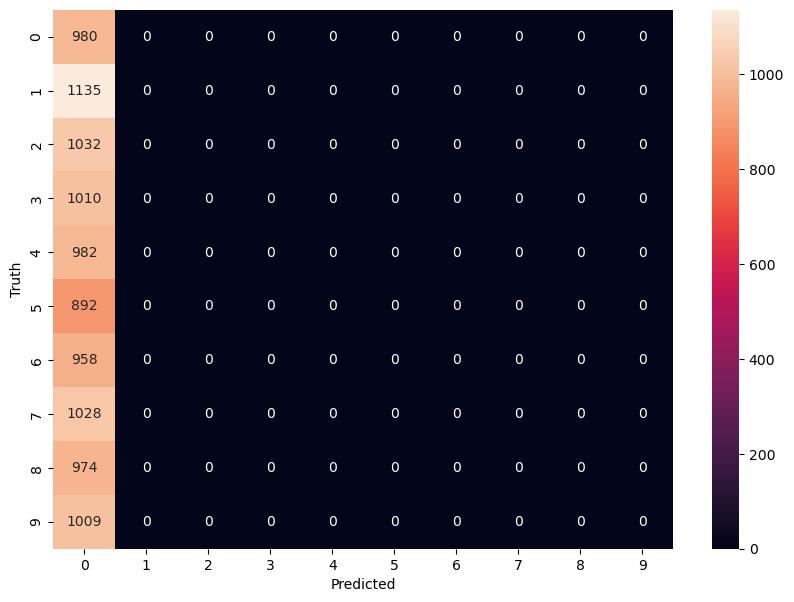

In [32]:
c_metx = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_cnn)
plt.figure(figsize = (10,7))
sn.heatmap(c_metx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
predict_out(model_cnn.predict((img5[1])))

1/1 [==============================] - 0s 23ms/step


5

In [24]:
import cv2


im = cv2.imread('image.png',cv2.IMREAD_GRAYSCALE)
print(im.shape)

image = cv2.resize(im, (28, 28))

# image = abs(255-image)


fig,ax = plt.subplots()
ax.imshow(X_test[0])

[ WARN:0@445.225] global loadsave.cpp:248 findDecoder imread_('image.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

(323, 323)
1/1 [==============================] - 0s 36ms/step
8


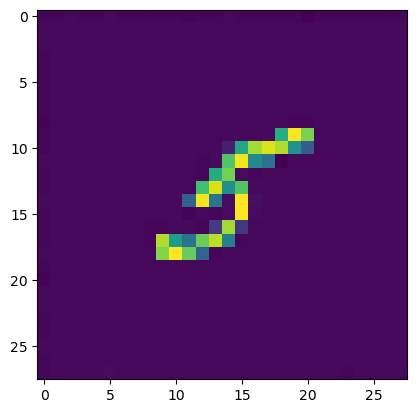

In [237]:
im = cv2.imread('5555.png',cv2.IMREAD_GRAYSCALE)
print(im.shape)
image = cv2.resize(im, (28, 28))


# img = X_test[5000]
img = image/255

fig,ax = plt.subplots()
ax.imshow(img)

img = img.reshape(1,28,28)
jjj = model.predict(img)

print(np.argmax(jjj))

In [238]:
print(np.argmax(jjj))

8


In [233]:
print(np.max(image))

165


In [168]:
# print(X_test[5000])

1/1 [==============================] - 0s 44ms/step
1


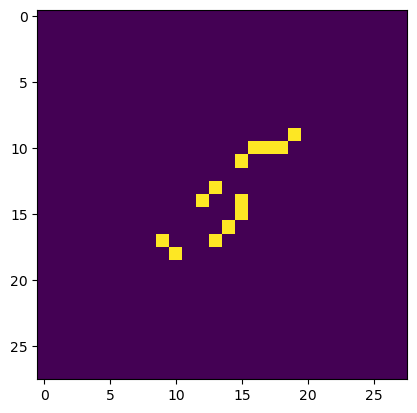

In [244]:
lower = np.array([210])
upper = np.array([255])

# Create mask to only select black
thresh = cv2.inRange(image, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(image, image, mask=mask)
fig,ax = plt.subplots()
ax.imshow(thresh)

img = thresh.reshape(1,28,28)
jjj = model.predict(img)

print(np.argmax(jjj))

In [245]:
# print(thresh)

In [54]:
im = cv2.imread('dog11.jpg')

[ WARN:0@67.463] global loadsave.cpp:248 findDecoder imread_('dog11.jpg'): can't open/read file: check file path/integrity


In [55]:
plt.imshow(im[1])

TypeError: 'NoneType' object is not subscriptable

In [252]:
print(im.shape)

(503, 406, 3)


In [253]:
print(im)

[[[255 255 254]
  [240 238 237]
  [234 232 231]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [240 238 237]
  [234 232 231]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [240 238 237]
  [233 231 230]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
